In [1]:
#NeuralNetwork define
class neuralNetwork:
    
    #init NeuralNetwork
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        #set node number of ipnut / hidden / output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        #select sigmoid function to activation function
        self.activation_function = lambda x: scipy.special.expit(x)
            
        #learning rate
        self.lr = learningrate
        
        #wih, who are matrix of weight
        #weight is discribe like w_i_j
        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        

        pass
    
    #train NeuralNetwork
    def train(self, inputs_list, targets_list):
        #transmit input_list matrix 
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        #calculate input/output for hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #calculate input/output for final layer
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        #error
        output_errors = targets - final_outputs
        hidden_errors = np.dot(self.who.T, output_errors)
        
        #weight update between hidden / final layer
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0- final_outputs)), np.transpose(hidden_outputs))
        #weight update between input / hidden layer
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0- hidden_outputs)), np.transpose(inputs))
        
        pass
    
    #query NeuralNetwork
    def query(self, inputs_list):
        inputs = np.array(inputs_list, ndmin=2).T
        
        #input / output for hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_ouputs = self.activation_function(hidden_inputs)
        
        #input / output for final layer
        final_inputs = np.dot(self.who, hidden_ouputs)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
        pass

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special

#number of input / hidden / output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

#learning rate is 0.3
learning_rate = 0.3

#create instance of neural network
n = neuralNetwork(input_nodes,
                 hidden_nodes,
                 output_nodes,
                 learning_rate)


In [3]:
#import csv file_mnist_dataset for training NeuralNetwork
training_data_file = open("mnist_dataset/mnist_train_100.csv",'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

#training Neural Network

#detect all record in training_data_set
for record in training_data_list:
    all_values = record.split(',')
    inputs = (np.asfarray(all_values[1:]) / 255 *0.09) +0.01
    targets = np.zeros(output_nodes) +0.01
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass

[[0.11445744]
 [0.10919917]
 [0.04795632]
 [0.10036618]
 [0.08366449]
 [0.04568783]
 [0.09775223]
 [0.14710121]
 [0.11263303]
 [0.07176763]]
network answer is  7
correct label is  7


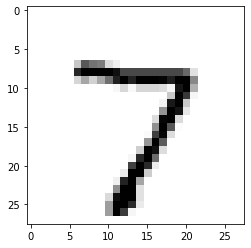

In [4]:
#test neural network

#import test minist data set
test_data_file = open("mnist_dataset/mnist_test_10.csv",'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

all_values = test_data_list[0].split(',')
image_arrays = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_arrays, cmap='Greys', interpolation='None')

inputs = (np.asfarray(all_values[1:]) / 255 *0.09) +0.01
network_answer = n.query(inputs)

print(network_answer)
ans_label = np.argmax(network_answer)
print("network answer is ", ans_label)
print("correct label is ", test_data_list[0][0])

In [42]:
def Formulate_input_for_query(test_data_line, num=0, image_on=False):
    
    all_values = test_data_line[num].split(',')
    
    image_arrays = np.asfarray(all_values[1:]).reshape((28,28))
    if (image_on):
        plt.imshow(image_arrays, cmap='Greys', interpolation='None')
    print("correct label is ", test_data_list[num][0])
    
    inputs = (np.asfarray(all_values[1:]) / 255 *0.09) +0.01
    return inputs, int(test_data_list[num][0])

In [43]:
test_data_file = open("mnist_dataset/mnist_test_10.csv",'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

test_inputs,ans = Formulate_input_for_query(test_data_list,9)
network_answer = n.query(test_inputs)
ans_label = np.argmax(network_answer)
print("network answer is ", ans_label)

correct label is  9
network answer is  7


In [49]:
#real test
test_data_file = open("mnist_dataset/mnist_test_10.csv",'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

#score of performance
scorecard = []
ans_rate = 0
for nst_data in range(10):
    test_inputs, correct_answer = Formulate_input_for_query(test_data_list,nst_data)
    network_answer = n.query(test_inputs)
    ans_label = np.argmax(network_answer)
    print("network answer is ", ans_label)
    if (ans_label == correct_answer):
        scorecard.append(1)
    else:
        scorecard.append(0)
print(scorecard)
scorecard_array = np.array(scorecard)
ans_rate = int(scorecard_array.sum() / scorecard_array.size *100)
print("%d correct in %d try \n====> %d persentage rate"%(scorecard_array.sum(), scorecard_array.size, ans_rate))

correct label is  7
network answer is  7
correct label is  2
network answer is  1
correct label is  1
network answer is  1
correct label is  0
network answer is  0
correct label is  4
network answer is  7
correct label is  1
network answer is  1
correct label is  4
network answer is  7
correct label is  9
network answer is  7
correct label is  5
network answer is  1
correct label is  9
network answer is  7
[1, 0, 1, 1, 0, 1, 0, 0, 0, 0]
4 correct in 10 try 
====> 40 persentage rate
